<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Regularization and Optimization for Neural Networks

---

_Authors: Matt Brems and Justin Pounders (but mainly Matt)_

The principal topic of the day is **how to control bias/variance tradeoff in neural nets.**

### Learning Objectives

By the end of the lesson, students should be able to:
- Explain how L1/L2, dropout, and early stopping regularization work and implement these methods in Keras
- Implement methods for speeding up learning

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import matplotlib.pyplot as plt



Bad key "text.kerning_factor" on line 4 in
/Users/ryanchangky/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load the data

In [2]:
data = pd.read_csv('./data/cell_phone_churn.csv')
data.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
data = data.drop('state', axis=1)
data.head()

,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
data['intl_plan'] = data['intl_plan'].map({'yes':1 , 'no':0})
data['vmail_plan'] = data['vmail_plan'].map({'yes':1 , 'no':0})
data.head()

,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
X = data.drop('churn',axis=1)
y = data['churn'].astype('int')

In [6]:
X.shape

(3333, 18)

In [7]:
X_train,X_test, y_train, y_test = train_test_split(X,y)

ss= StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

## Build a simple neural net to model churn

Let's build this:

- a dense network,
- one input layer,
- one hidden layer 
  - same number of nodes as input layer,
  - ReLU activation
- single node output (for binary classification)
  - sigmoid activation
  
> **Fun fact**: If we dropped the hidden layer, this model would just be logistic regression!  Can you prove that to yourself?

In [8]:
X_train_sc.shape[1]

18

In [9]:
# Insert model here...
model = Sequential()
model.add(Dense(18, input_dim=X_train_sc.shape[1], activation='relu'))
#model.add(Dense(18, input_shape=(X_train_sc.shape[1],), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Fit it
history = model.fit(X_train_sc,y_train,
                   validation_data=(X_test_sc,y_test),
                   epochs=100)

Epoch 1/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6051 - accuracy: 0.6831 - val_loss: 0.4812 - val_accuracy: 0.8070
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.8419 - val_loss: 0.4036 - val_accuracy: 0.8573
Epoch 3/100
79/79 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.8587 - val_loss: 0.3752 - val_accuracy: 0.8561
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 0.3580 - accuracy: 0.8611 - val_loss: 0.3583 - val_accuracy: 0.8537
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8615 - val_loss: 0.3465 - val_accuracy: 0.8609
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8679 - val_loss: 0.3377 - val_accuracy: 0.8645
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8687 - val_loss: 0.3290 - val_accuracy: 0.8645
Epoch 8/100
7

Epoch 59/100
79/79 [==============================] - 0s 3ms/step - loss: 0.1882 - accuracy: 0.9376 - val_loss: 0.2546 - val_accuracy: 0.9185
Epoch 60/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1888 - accuracy: 0.9368 - val_loss: 0.2556 - val_accuracy: 0.9161
Epoch 61/100
79/79 [==============================] - 0s 3ms/step - loss: 0.1876 - accuracy: 0.9392 - val_loss: 0.2543 - val_accuracy: 0.9149
Epoch 62/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1880 - accuracy: 0.9376 - val_loss: 0.2548 - val_accuracy: 0.9185
Epoch 63/100
79/79 [==============================] - 0s 4ms/step - loss: 0.1873 - accuracy: 0.9384 - val_loss: 0.2544 - val_accuracy: 0.9125
Epoch 64/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1869 - accuracy: 0.9376 - val_loss: 0.2545 - val_accuracy: 0.9173
Epoch 65/100
79/79 [==============================] - 0s 3ms/step - loss: 0.1859 - accuracy: 0.9392 - val_loss: 0.2545 - val_accuracy: 0.9149
Epoch 

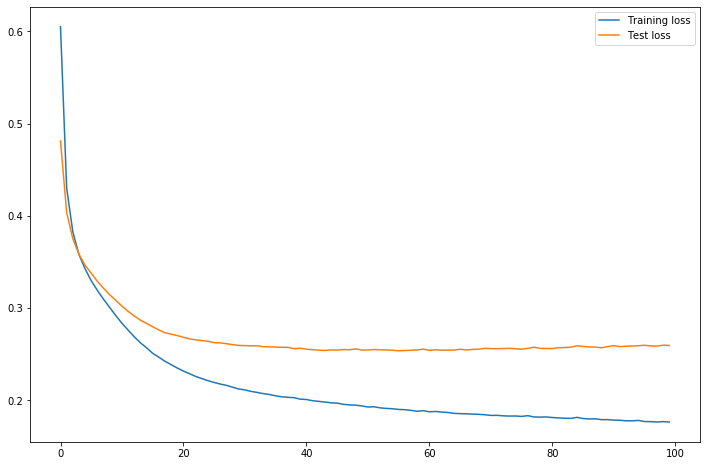

In [12]:
# Look, Ma, the machine is learning!
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(12,8))
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Test loss')
plt.legend()

Without regularization, **val_loss:**.

In [13]:
test_loss[-1]

0.2594735622406006

![](assets/overkill.jpg)

<a id='l1'></a>
## Regularization Method 1: L1 and L2 
---
Just as we did with linear and logistic regression, we can use `L1` and `L2` regularization on our neural networks.

Neural networks are just large combinations of linear functions that are modified using some activation function:

$$z = b_0 + \sum_{j=1}^p w_j x_j$$
$$a = g(z)$$

Where $x_j$ is one input (i.e. one observation's blood pressure, one observation's sex, etc.), $w_j$ is the weight/coefficient for that particular variable, $b_0$ is our bias, and $g$ is our activation function. If we used a sigmoid function as we would for logistic regression, $g$ would be:
$$g(z) = \frac{1}{1 + e^{-z}}$$

After we've done this for every node, we can then compute the loss for every node as a function of their parameters:
$$\text{loss} = \frac{1}{m}\sum_{i=1}^{m}L(\hat{y}_i, y_i)$$

This is our average loss. In a regression context, this is usually mean squared error; in a classification context this might be categorical cross-entropy or something else. This would be our loss function *without regularization*.

We'll then implement gradient descent:

$$w_j := w_j -\alpha\frac{\partial \text{loss}}{\partial w_j}$$

where $\alpha$ is our learning rate and $\frac{\partial \text{loss}}{\partial w_j}$ represents the partial derivative of our loss function with respect to our weight $w_j$.

This is how we implement gradient descent **without regularization**.

#### So, how do we implement gradient descent with `L1` or `L2` regularization?

> We just change the loss function to add a penalty! If we want to add a penalty term, we do the **exact same thing** we did with linear or logistic regression:

$$\text{L2 regularized loss} = \frac{1}{m}\sum_{i=1}^{m}L(\hat{y}_i, y_i) + \frac{\lambda}{2m}\sum_{l=1}^{L}||w_{[l]}||^2$$

Now, $$\frac{\partial \text{L2 regularized loss}}{\partial w_{[l]}} = \frac{\partial \text{loss}}{\partial w_j} + \frac{\lambda}{m}w_j$$
and
$$w_j := w_j -\alpha\frac{\partial \text{L2 regularized loss}}{\partial w_j}$$

In this example we used `L2` regularization, although `L1` works in the same way. You may see `L2` regularization referred to as "*weight decay*."

**Practical Note:** According to Andrew Ng, `L2` (as opposed to `L1`) is generally used for regularizing neural networks and it's rare to find `L1`.

As before, $\lambda$ is a hyperparameter to be selected by constructing multiple networks and identifying which value performs the best.
- Intuitively, as $\lambda \rightarrow \infty$, our weights get closer and closer to 0 (just like when we regularized our linear models before).
- Intuitively, as $\lambda \rightarrow \infty$, if we're using the `sigmoid` or `tanh` activation functions, we force our weights to stay in that "linear" region in the middle. This speeds up the learning process!

In [14]:
from tensorflow.keras import regularizers

model_l2 = Sequential()

model_l2.add(Dense(18,
                   input_dim=18,
                   activation='relu',
                   kernel_regularizer= regularizers.l2(0.01)))
model_l2.add(Dense(1,
                   activation='sigmoid',
                   kernel_regularizer=regularizers.l2(0.01)))

model_l2.compile(loss='binary_crossentropy',
                 optimizer ='adam',
                 metrics =['accuracy'])

history_l2 = model_l2.fit(X_train_sc, y_train,
             validation_data=(X_test_sc,y_test),
             epochs=100)

Epoch 1/100
79/79 [==============================] - 0s 3ms/step - loss: 0.7170 - accuracy: 0.7399 - val_loss: 0.6374 - val_accuracy: 0.8417
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5879 - accuracy: 0.8547 - val_loss: 0.5476 - val_accuracy: 0.8585
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5170 - accuracy: 0.8563 - val_loss: 0.4935 - val_accuracy: 0.8585
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.8583 - val_loss: 0.4567 - val_accuracy: 0.8561
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.8583 - val_loss: 0.4302 - val_accuracy: 0.8585
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8587 - val_loss: 0.4099 - val_accuracy: 0.8609
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8599 - val_loss: 0.3951 - val_accuracy: 0.8633
Epoch 8/100
7

79/79 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.9064 - val_loss: 0.3211 - val_accuracy: 0.9077
Epoch 59/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.9064 - val_loss: 0.3210 - val_accuracy: 0.9077
Epoch 60/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.9068 - val_loss: 0.3209 - val_accuracy: 0.9101
Epoch 61/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.9036 - val_loss: 0.3215 - val_accuracy: 0.9101
Epoch 62/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.9044 - val_loss: 0.3214 - val_accuracy: 0.9113
Epoch 63/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.9096 - val_loss: 0.3206 - val_accuracy: 0.9113
Epoch 64/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.9080 - val_loss: 0.3203 - val_accuracy: 0.9125
Epoch 65/100
79/79 

In [15]:
train_loss_l2 = history_l2.history['loss']
test_loss_l2 = history_l2.history['val_loss']
test_loss_l2[-1]

0.31992000341415405

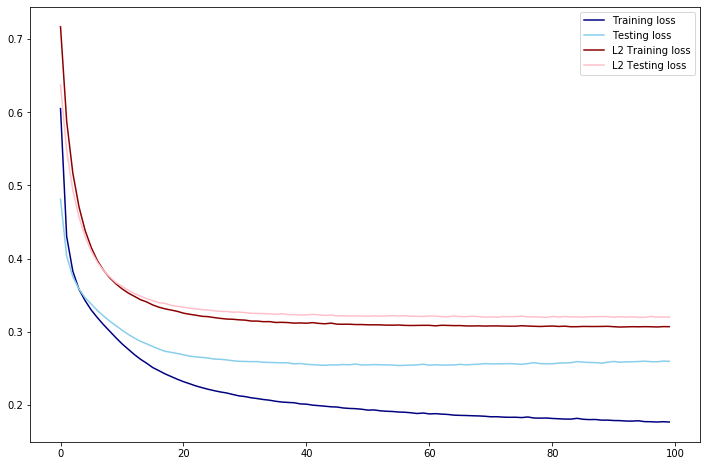

In [16]:
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.plot(train_loss_l2, label='L2 Training loss', color='darkred')
plt.plot(test_loss_l2, label='L2 Testing loss', color='pink')
plt.legend();

With `L2` regularization and $\lambda = 0.01$, **val_loss: 0.3199 **.

In [17]:
history_l2.history['accuracy'][-1] # train accuracy

0.9071628451347351

In [18]:
history_l2.history['val_accuracy'][-1] #test accuracy

0.9124700427055359

## Keras Resources
- [Keras Regularization Documentation](https://keras.io/regularizers/)
- [Kernel vs. Activity Regularizers](https://github.com/keras-team/keras/issues/3236)

## Tensorflow Resources
- [Implementation in Tensorflow](https://www.tensorflow.org/versions/r0.12/api_docs/python/contrib.layers/regularizers)
- [Example in Tensorflow](http://www.ritchieng.com/machine-learning/deep-learning/tensorflow/regularization/)

<a id='dropout'></a>
## Regularization Method 2: Dropout
---
There's another method of regularizing our terms that is specifically designed for neural networks, called **dropout regularization.**

Let's say we've constructed a neural network. We've decided on the number of layers we want and the number of nodes in each layer. (We might say that we've decided on the **topology** or **structure** of our network.)

![](./assets/original_nn.jpeg)

However, a densely connected network like this will almost certainly overfit. Our network is learning a parameter for every single connection.
> In the above example, we have 55 parameters being learned - and this is a very simple network, all things considered.

> We can overcome this by using **dropout regularization**. 

In dropout regularization, we randomly **drop** units (nodes) in our neural network ***during our training phase only***. We assign a probability of each node disappearing. Then, we essentially perform a coinflip for every node to turn that node "on" or "off."

Let's go through an example to illustrate this: For simplicity, we'll say we've assigned a 0.5 probability of keeping to every node in the network above. Then, for every node, we flip a coin, and if the coin lands on heads, the node remains, if it lands on tails, the node disappears. After we've done this for every node, we're left with a new network that looks something like this:

![](./assets/after_dropout.jpeg)

<!--
Image sources: https://pgaleone.eu/deep-learning/regularization/2017/01/10/anaysis-of-dropout/
Also, it seems, this site: http://cs231n.github.io/neural-networks-2/
-->

Let's explicitly lay out the general workflow you would follow:

1. Specify the **topology** of your neural network.
2. Initialize your weights and biases.
3. Specify the "keeping probabilities" for every node. (Generally, we'll assign the same probability to all nodes in each layer and usually the same probability to all hidden layers.)
4. Perform a "coin flip" for each node and drop out the chosen nodes.
5. Run through one epoch of training.
6. Repeat steps 4 and 5 for each epoch of training.

**Check:** If I drop out a node during one of my epochs, does it disappear from my final network?

#### So, what does this do?
<!-- <br/> -->
The intuition behind dropout is that, since each node has a probability of disappearing at any time, the neural network is disincentivized from allocating too much power to any one weight. It has a similar effect as imposing an L2 penalty: the magnitude of our weights shrinks.

**Check:** What might be some potential problems with doing this?

<!--
expected values of nodes changes; induces bias
-->

#### Inverted Dropout

In order to avoid any issues with the expected values of our nodes changing, we adjust our results accordingly by a method called **inverted dropout**.

If we have a hidden layer with 100 nodes and each node has a 80% probability of being "staying turned on," we only have 80% of those inputs to our node. As a result, we expect that the combined input to our node $z = b_0 + \sum_{i=1}^pw_ix_i$ will be off by about 20%. (Those interested in probability and research might note that the Binomial distribution is a very convenient model for neural networks and dropout.)

When using inverted dropout, we adjust $z$ by the "keeping probability."

$$
\begin{eqnarray*}
z_{original} &=& b_0 + \sum_{i=1}^pw_ix_i \\
\Rightarrow z_{dropout} &=& b_0 + \sum_{i\in\{included\_nodes\}}w_ix_i \\
\Rightarrow z_{inverted\_dropout} &:=& z_{dropout} / 0.8 \\
\end{eqnarray*}
$$

#### Test time:

So we've now run through every epoch of our training phase and we're ready to apply our neural network to our validation or testing data. Are we going to apply dropout to this data as well?

**NO.**

#### Best practices:

- Don't set any keeping probabilities for layers you where you don't want to drop any nodes. (What might be examples of these layers?)
<!--
Input and output layers
-->
- You'll generally want to specify a single keeping probability on all the layers on which you want to apply dropout, instead of specifying different keeping probabilities for each layer.

In [19]:
from tensorflow.keras.layers import Dropout

model_dropout = Sequential()

model_dropout.add(Dense(18,
                       input_dim=18,
                       activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(1, activation='sigmoid'))

model_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_dropout = model_dropout.fit(X_train_sc,y_train, 
                                    validation_data=(X_test_sc,y_test), epochs=100)

Epoch 1/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6306 - accuracy: 0.6719 - val_loss: 0.4402 - val_accuracy: 0.8561
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.7727 - val_loss: 0.3817 - val_accuracy: 0.8681
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4495 - accuracy: 0.8127 - val_loss: 0.3605 - val_accuracy: 0.8621
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.8247 - val_loss: 0.3483 - val_accuracy: 0.8633
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8439 - val_loss: 0.3409 - val_accuracy: 0.8597
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8495 - val_loss: 0.3352 - val_accuracy: 0.8597
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8527 - val_loss: 0.3295 - val_accuracy: 0.8645
Epoch 8/100
7

Epoch 59/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2521 - accuracy: 0.9052 - val_loss: 0.2431 - val_accuracy: 0.9209
Epoch 60/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2603 - accuracy: 0.9068 - val_loss: 0.2427 - val_accuracy: 0.9209
Epoch 61/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2638 - accuracy: 0.9052 - val_loss: 0.2441 - val_accuracy: 0.9197
Epoch 62/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2571 - accuracy: 0.9088 - val_loss: 0.2431 - val_accuracy: 0.9161
Epoch 63/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2571 - accuracy: 0.9076 - val_loss: 0.2422 - val_accuracy: 0.9185
Epoch 64/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.9108 - val_loss: 0.2416 - val_accuracy: 0.9197
Epoch 65/100
79/79 [==============================] - 0s 2ms/step - loss: 0.2522 - accuracy: 0.9096 - val_loss: 0.2407 - val_accuracy: 0.9221
Epoch 

In [20]:
train_loss_dropout = history_dropout.history['loss']
test_loss_dropout = history_dropout.history['val_loss']
test_loss_dropout[-1]

0.22750847041606903

With Dropout, **val_loss: 0.2275**.

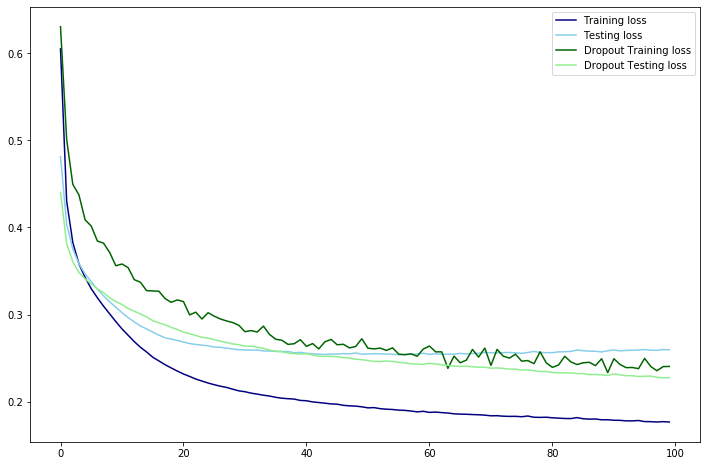

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.plot(train_loss_dropout, label='Dropout Training loss', color='darkgreen')
plt.plot(test_loss_dropout, label='Dropout Testing loss', color='lightgreen')
plt.legend();

In [22]:
history_dropout.history['val_accuracy'][-1]

0.9268584847450256

## Keras Resources
- [Keras Dropout Documentation](https://keras.io/layers/core/#dropout)

## Tensorflow Resources
- [Tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf/nn/dropout)
- [List of examples in Tensorflow](https://programtalk.com/python-examples/tensorflow.nn.dropout/)

<a id='stopping'></a>
## Regularization Method 3: Early Stopping
---
The third method of regularization that we'll discuss today is called early stopping.
</br>
If we run though all our epochs of training and plot both our training and validation error, we'll typically see something like this:

![](./assets/train-val-error-reduced.png)
*source: [Prechelt, 1997](http://page.mi.fu-berlin.de/prechelt/Biblio/stop_tricks1997.pdf) *

**Check:** What is happening in this plot?

Early stopping does exactly what its name implies: it stop the training process early. Instead of continuing training through every epoch, once the validation error begins to increase, our algorithm stops because it has (in theory) found the minimum for the validation loss.

This might seem like a simple and robust solution to overfitting, but it can run into problems.

<details>
![](./assets/validation-error-real.png)
</details>

There is debate over how often this problem occurs. You can generally plot both the training and validation loss, see if you're getting multiple optima. If you are, there are multiple suggested techniques to combat this problem in the [paper reference above](http://page.mi.fu-berlin.de/prechelt/Biblio/stop_tricks1997.pdf).

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

model_earlystop = Sequential()

model_earlystop.add(Dense(18, input_dim=18,activation='relu'))
model_earlystop.add(Dense(1, activation='sigmoid'))

model_earlystop.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model_earlystop.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 19        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [25]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='auto')

In [26]:
history_es = model_earlystop.fit(X_train_sc, y_train, validation_data=(X_test_sc,y_test),
                                epochs=100,
                                callbacks=[early_stop])

Epoch 1/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6603 - accuracy: 0.6411 - val_loss: 0.5079 - val_accuracy: 0.7686
Epoch 2/100
79/79 [==============================] - 0s 3ms/step - loss: 0.4475 - accuracy: 0.8231 - val_loss: 0.4056 - val_accuracy: 0.8501
Epoch 3/100
79/79 [==============================] - 0s 3ms/step - loss: 0.3828 - accuracy: 0.8575 - val_loss: 0.3687 - val_accuracy: 0.8549
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.8595 - val_loss: 0.3474 - val_accuracy: 0.8573
Epoch 5/100
79/79 [==============================] - 0s 3ms/step - loss: 0.3346 - accuracy: 0.8611 - val_loss: 0.3341 - val_accuracy: 0.8645
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3213 - accuracy: 0.8651 - val_loss: 0.3242 - val_accuracy: 0.8645
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8703 - val_loss: 0.3158 - val_accuracy: 0.8681
Epoch 8/100
7

Epoch 59/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1844 - accuracy: 0.9412 - val_loss: 0.2407 - val_accuracy: 0.9221
Epoch 60/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1842 - accuracy: 0.9424 - val_loss: 0.2407 - val_accuracy: 0.9197
Epoch 61/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1840 - accuracy: 0.9416 - val_loss: 0.2416 - val_accuracy: 0.9233
Epoch 62/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1841 - accuracy: 0.9420 - val_loss: 0.2406 - val_accuracy: 0.9221
Epoch 63/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1836 - accuracy: 0.9408 - val_loss: 0.2402 - val_accuracy: 0.9221
Epoch 64/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1833 - accuracy: 0.9408 - val_loss: 0.2400 - val_accuracy: 0.9209
Epoch 65/100
79/79 [==============================] - 0s 2ms/step - loss: 0.1822 - accuracy: 0.9432 - val_loss: 0.2397 - val_accuracy: 0.9221
Epoch 

In [27]:
len(history_es.history['val_loss'])

70

In [28]:
train_loss_es = history_es.history['loss']
test_loss_es = history_es.history['val_loss']

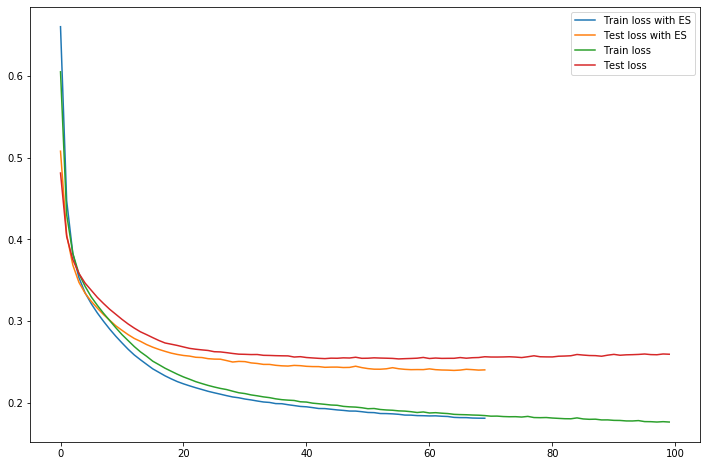

In [29]:
plt.figure(figsize=(12,8))
plt.plot(train_loss_es, label='Train loss with ES')
plt.plot(test_loss_es, label='Test loss with ES')
plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss')
plt.legend()

In [30]:
test_loss_es[-1]

0.2403424084186554

In [31]:
history_es.history['accuracy'][-1]

0.9427770972251892

In [32]:
history_es.history['val_accuracy'][-1] #test accuracy

0.9208633303642273

With early stopping, **val_loss:0.2403**.

## Keras Resources
- [Keras EarlyStopping Documentation](https://keras.io/callbacks/#earlystopping)
- [Keras EarlyStopping Example](http://parneetk.github.io/blog/neural-networks-in-keras/)

## Tensorflow Resources
- [Tensorflow.Keras.callbacks.EarlyStopping Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

<a id='conclusion'></a>
# Conclusion

Today, we learned about three different methods of regularizing our neural networks: `L2` regularization, dropout, and early stopping.

## Machine Learning Workflow

As promised, managing bias and variance takes a lot of our attention. If our bias or variance are high, it's likely that our model isn't performing as well as it could.

A workflow for how you should address this (in the context of neural networks and beyond) is as follows:

- Do we have high bias? (i.e. are we performing poorly on our training set?)
    - If so:
        - let's build a more complex model / bigger network!
        - let's consider a new architecture for our neural network!
        - let's train longer!
- Do we have high variance? (i.e. are we performing poorly on our test/holdout set?)
    - If so:
        - let's gather more data!
            - Usually very difficult, but we should use "data augmentation" if we can!
        - let's build a simpler model / smaller network!
        - let's consider a new architecture for our neural network!
        - let's regularize!
    - Once we're satisfied, return to the bias question and repeat.
    
**Note:** Before deep learning, most tools for handling high bias or high variance adversely affected the other. However, depending on the amount of data we have and how complex our network is, it's often the case that we can drastically reduce variance with out affecting bias.

<a id='references'></a>
## References and Resources:

- [DeepLearning.ai](https://www.deeplearning.ai/), Andrew Ng's Coursera course on Deep Learning
  - The videos from this course are on a [YouTube Channel](https://www.youtube.com/channel/UCcIXc5mJsHVYTZR1maL5l9w/featured)   
<br>
- [Deep Learning Book](http://www.deeplearningbook.org/), textbook written by Ian Goodfellow, creator of Generative Adversarial Networks (GANs)